<h1><center> Comparação das Eleições Presidenciais de 1989 a 2022 </center></h1>

Esse estudo tem por objetivo analisar e comparar os resutados das eleições presidenciais brasileiras no período pós constituição de 1988, a fim de identificar correlações e padrões de comportamento entre primeiro e segundo turno.
Também uso desse trabalho como objetivo pessoal de aprimorar meus conhecimentos em análise de dados e ferramentas de visualização como Matplotlib e Seaborn. 


### Pacotes e bibliotecas

In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importação dos dados

Os dados foram coletados no site do TSE e filtrados previamente no Excel, o dataframe utilizado contém as seguintes colunas:
    
    - ANO: ano da eleição;
        
    - CANDIDATO: nome completo do candidato e partido;
        
    - CANDIDATO2: nome abreviado do candidato;
        
    - 1_TURNO: número de votos obtidos no 1º turno;
        
    - 2_TURNO: número de votos obtidos no 2º turno;
        
    - STATUS: status do candidato pós eleição:
            
            - ELEITO: candidato eleito;
                
            - SEGUNDO: candidato que disputou o segundo turno;
                
            - OUTROS: candidato que não disputou o segundo turno.
                
            - SEG_TURNO: candidatos que irão disputar o segundo turno de 2022.

In [379]:
dados = pd.read_csv('resultados_eleicoes.csv', sep=';')
dados.head()

,ANO,CANDIDATO,CANDIDATO2,1_TURNO,2_TURNO,STATUS
0,1989,Fernando Collor (PRN),COLLOR,20611011,35089998.0,ELEITO
1,1989,Luiz Inácio Lula da Silva (PT),LULA,11622673,31076364.0,SEGUNDO
2,1989,Leonel Brizola (PDT),BRIZOLA,11168228,NaN,OUTROS
3,1989,Mário Covas (PSDB),COVAS,7790392,NaN,OUTROS
4,1989,Paulo Maluf (PDS),MALUF,5986575,NaN,OUTROS


In [380]:
dados.rename({'1_TURNO':'PRI_TURNO','2_TURNO':'SEG_TURNO'}, axis=1, inplace=True)

In [381]:
dados.head()

,ANO,CANDIDATO,CANDIDATO2,PRI_TURNO,SEG_TURNO,STATUS
0,1989,Fernando Collor (PRN),COLLOR,20611011,35089998.0,ELEITO
1,1989,Luiz Inácio Lula da Silva (PT),LULA,11622673,31076364.0,SEGUNDO
2,1989,Leonel Brizola (PDT),BRIZOLA,11168228,NaN,OUTROS
3,1989,Mário Covas (PSDB),COVAS,7790392,NaN,OUTROS
4,1989,Paulo Maluf (PDS),MALUF,5986575,NaN,OUTROS


In [382]:
dados.fillna(0, inplace=True)

In [383]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ANO         117 non-null    int64  
 1   CANDIDATO   117 non-null    object 
 2   CANDIDATO2  117 non-null    object 
 3   PRI_TURNO   117 non-null    int64  
 4   SEG_TURNO   117 non-null    float64
 5   STATUS      117 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 5.6+ KB


## Votos válidos e abstenções

In [384]:
votos_validos = dados.query('CANDIDATO != "ABSTENÇÕES"')
abstencoes = dados.query('CANDIDATO == "ABSTENÇÕES"')

In [385]:
vv_agrupado = votos_validos.groupby(by='ANO').sum()
vv_agrupado

,PRI_TURNO,SEG_TURNO
ANO,,
1989,72280909,70260701.0
1994,77968464,0.0
1998,83297863,0.0
2002,94802339,91664001.0
2006,104820459,101998221.0
2010,111193747,106605942.0
2014,115122870,112683879.0
2018,117363888,115933451.0
2022,123682372,0.0


In [386]:
abst_agrupado = abstencoes.groupby(by='ANO').sum()
abst_agrupado

,PRI_TURNO,SEG_TURNO
ANO,,
1989,9793809,11814017.0
1994,16833946,0.0
1998,22773983,0.0
2002,20449987,23589188.0
2006,21092675,23914741.0
2010,24610296,29197152.0
2014,27699435,30137479.0
2018,29941171,31371704.0
2022,32770982,0.0


In [387]:
## valores aproximados da população brasileira
populacao = {'ANO':(1989,1994,1998,2002,2006,2010,2014,2018,2022),
             'POPULACAO':(146328305,159432717,169785253,179537522,188167353,195713637,202763744,209469320,215353588)}
pop = pd.DataFrame(populacao)
pop

,ANO,POPULACAO
0,1989,146328305
1,1994,159432717
2,1998,169785253
3,2002,179537522
4,2006,188167353
5,2010,195713637
6,2014,202763744
7,2018,209469320
8,2022,215353588


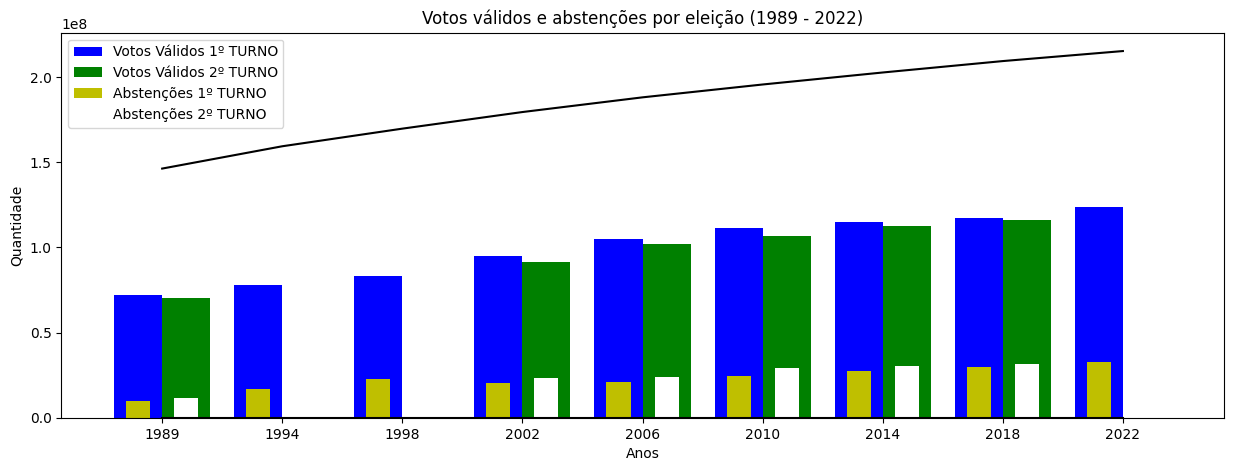

In [388]:
X = vv_agrupado.index.to_list()
X_axis = np.arange(len(X))

ax = plt.figure(figsize=(15,5))
p1 = plt.bar(X_axis - 0.2, vv_agrupado['PRI_TURNO'],0.4, color='b')
plt.bar(X_axis + 0.2, vv_agrupado['SEG_TURNO'],0.4, color='g')
plt.bar(X_axis - 0.2, abst_agrupado['PRI_TURNO'],0.2, color='y')
plt.bar(X_axis + 0.2, abst_agrupado['SEG_TURNO'],0.2, color='w')

plt.xticks(X_axis,X)
plt.legend(['Votos Válidos 1º TURNO','Votos Válidos 2º TURNO','Abstenções 1º TURNO','Abstenções 2º TURNO'])
plt.xlabel('Anos')
plt.ylabel('Quantidade')
plt.title('Votos válidos e abstenções por eleição (1989 - 2022)')
plt.plot(pop, color='black')

ax = ax

In [389]:
total_agrupado = pd.merge(vv_agrupado,pop, on='ANO')

In [390]:
total_agrupado['1_TURNO/POPULAÇÃO %'] = round((total_agrupado['PRI_TURNO'] / total_agrupado['POPULACAO'])*100,2)
total_agrupado['2_TURNO/POPULAÇÃO %'] = round((total_agrupado['SEG_TURNO'] / total_agrupado['POPULACAO'])*100,2)
total_agrupado

,ANO,PRI_TURNO,SEG_TURNO,POPULACAO,1_TURNO/POPULAÇÃO %,2_TURNO/POPULAÇÃO %
0,1989,72280909,70260701.0,146328305,49.40,48.02
1,1994,77968464,0.0,159432717,48.90,0.00
2,1998,83297863,0.0,169785253,49.06,0.00
3,2002,94802339,91664001.0,179537522,52.80,51.06
4,2006,104820459,101998221.0,188167353,55.71,54.21
5,2010,111193747,106605942.0,195713637,56.81,54.47
6,2014,115122870,112683879.0,202763744,56.78,55.57
7,2018,117363888,115933451.0,209469320,56.03,55.35
8,2022,123682372,0.0,215353588,57.43,0.00


Duas coisas chamam a atenção:
    
    - Em todas as eleições com segundo turno, o número de votos válidos cai do primeiro para o segundo turno, em contrapartida o número de abstenções sobe.
    
    - O número de votos válidos teve uma crescente em relação à população.

### Análises de Eleições com Segundo Turno

Como o objetivo é tentar identificar algum padão nas eleições com segundo turno, será retirado do dataframe as eleições resolvidas no primeiro turno e separada as informações referentes a eleição em andamento (2022). Além disso, os votos dos candidatos que não foram para o segundo turno serão agrupados.

In [391]:
segundo_turno = dados.query('SEG_TURNO > 0')
segundo_turno.drop(columns=['CANDIDATO','CANDIDATO2'],axis=1, inplace=True)
segundo_turno.head()

,ANO,PRI_TURNO,SEG_TURNO,STATUS
0,1989,20611011,35089998.0,ELEITO
1,1989,11622673,31076364.0,SEGUNDO
22,1989,4649897,4094339.0,BRANCOS/NULOS
23,1989,9793809,11814017.0,ABSTENÇÕES
48,2002,39455233,52793364.0,ELEITO


In [392]:
outros = dados.query('STATUS =="OUTROS" & ANO != 1994 & ANO != 1998 & ANO != 2022')
outros = outros.groupby(by='ANO').sum()
outros['STATUS'] = 'OUTROS'
outros = outros.reset_index()
outros

,ANO,PRI_TURNO,SEG_TURNO,STATUS
0,1989,35397328,0.0,OUTROS
1,2002,25791834,0.0,OUTROS
2,2006,9365999,0.0,OUTROS
3,2010,20806436,0.0,OUTROS
4,2014,25858923,0.0,OUTROS
5,2018,26431688,0.0,OUTROS


In [393]:
dados2= pd.concat([segundo_turno, outros])
dados2 = dados2.sort_values(by='ANO').reset_index()
dados2.drop('index',axis=1, inplace=True)

In [394]:
dados2

,ANO,PRI_TURNO,SEG_TURNO,STATUS
0,1989,20611011,35089998.0,ELEITO
1,1989,11622673,31076364.0,SEGUNDO
2,1989,4649897,4094339.0,BRANCOS/NULOS
3,1989,9793809,11814017.0,ABSTENÇÕES
4,1989,35397328,0.0,OUTROS
5,2002,39455233,52793364.0,ELEITO
6,2002,19705445,33370739.0,SEGUNDO
7,2002,9849827,5499898.0,BRANCOS/NULOS
8,2002,20449987,23589188.0,ABSTENÇÕES
9,2002,25791834,0.0,OUTROS


In [395]:
# df apenas com os presidentes eleitos
eleitos = dados2.query('STATUS == "ELEITO"')

# df apenas com os candidatos que perderam no segundo turno
segundos = dados2.query('STATUS == "SEGUNDO"')

#df com os votos brancos e nulos
brancos_nulos = dados2.query('STATUS == "BRANCOS/NULOS"')

#df com as abstenções
abstencoes = dados2.query('STATUS == "ABSTENÇÕES"')

In [396]:
x=dados2['ANO'].unique()
eixo_x = np.arange(len(x))

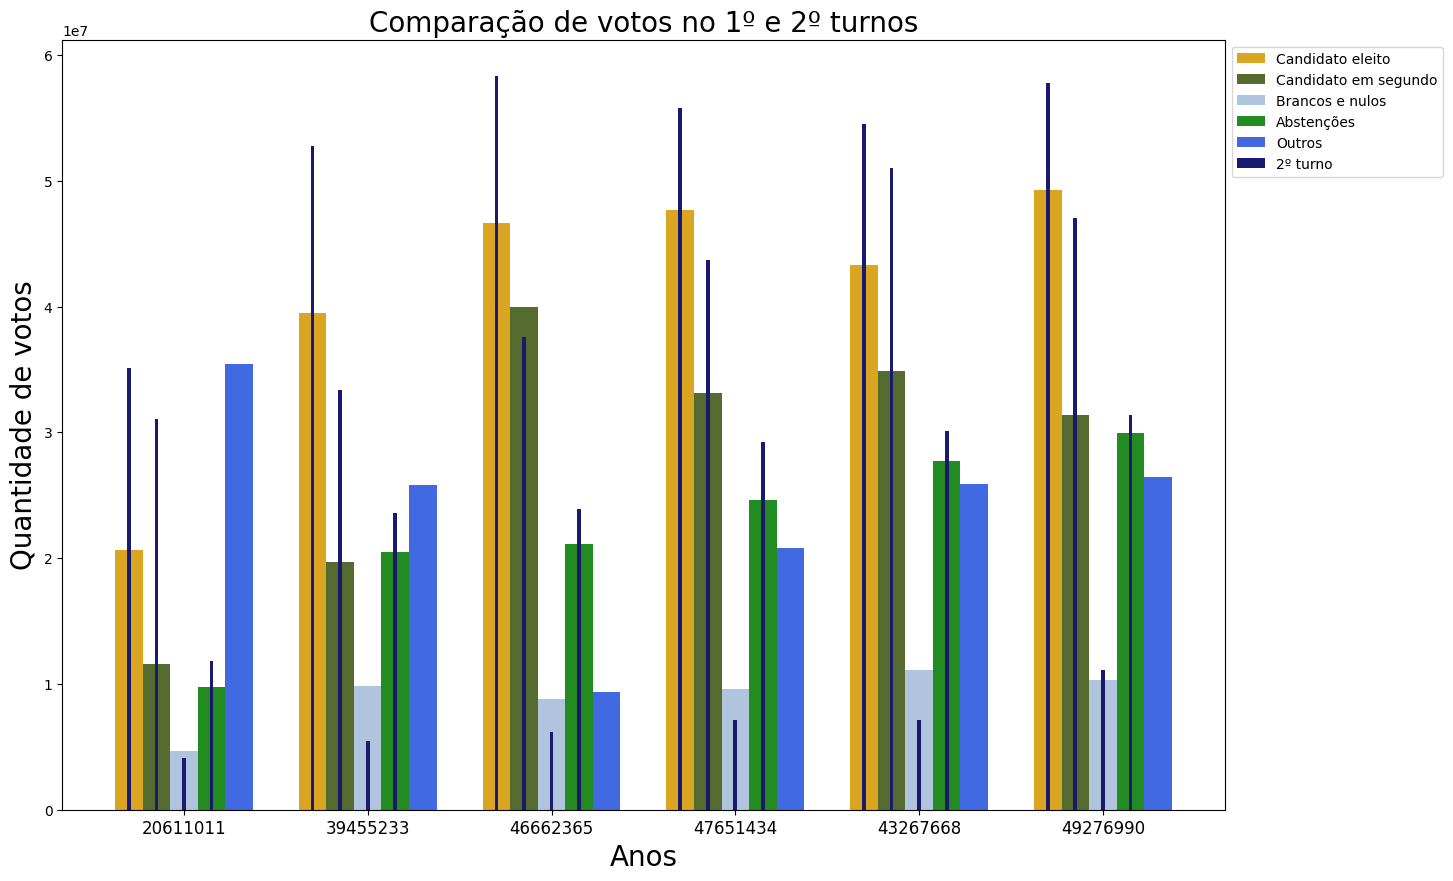

In [422]:
ax = plt.figure(figsize=(15,10))

# barras referentes ao 1º turno
plt.bar(eixo_x - 0.3, eleitos['PRI_TURNO'],0.15, color='goldenrod')
plt.bar(eixo_x - 0.15, segundos['PRI_TURNO'],0.15, color='darkolivegreen')
plt.bar(eixo_x + 0.00, brancos_nulos['PRI_TURNO'],0.15,color='lightsteelblue')
plt.bar(eixo_x + 0.15, abstencoes['PRI_TURNO'],0.15,color='forestgreen')
plt.bar(eixo_x + 0.3, outros['PRI_TURNO'],0.15,color='royalblue')

# barras referentes ao 2º turno
plt.bar(eixo_x - 0.3, eleitos['SEG_TURNO'],0.02, color='midnightblue')
plt.bar(eixo_x - 0.15, segundos['SEG_TURNO'],0.02, color='midnightblue')
plt.bar(eixo_x + 0.00, brancos_nulos['SEG_TURNO'],0.02,color='midnightblue')
plt.bar(eixo_x + 0.15, abstencoes['SEG_TURNO'],0.02,color='midnightblue')

# estilização
plt.xticks(eixo_x,x, fontdict={'fontsize':12})
plt.legend(['Candidato eleito','Candidato em segundo','Brancos e nulos','Abstenções','Outros','2º turno'], bbox_to_anchor=(1,1))
plt.xlabel('Anos',fontdict={'fontsize':20})
plt.ylabel('Quantidade de votos',fontdict={'fontsize':20})
plt.title('Comparação de votos no 1º e 2º turnos', fontdict={'fontsize':20})

ax = ax

### Gráfico de linha dos tipos de votos

#### Primeiro Turno

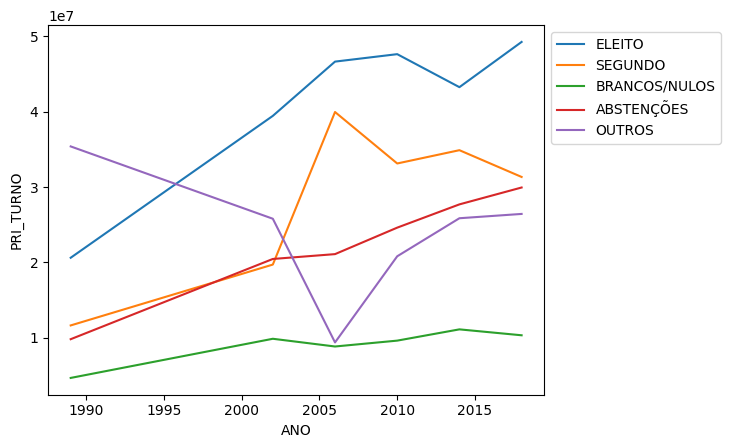

In [398]:
sns.lineplot(x='ANO',y='PRI_TURNO',data=dados2, hue='STATUS')
plt.legend(bbox_to_anchor=(1,1))

Pela visualização gráfica nota-se que:
    
    - A evolução dos votos no primeiro turno para o candidato eleito, abstenções e brancos/nulos apresentam uma característica linear.
    
    - Em relação aos votos no candidato derrotado no segundo turno as linhas parecem ter uma correlação inversa até a eleição de 2010, o que pode indicar uma certa tendência dos eleitores que votaram em candidatos que não foram para o segundo turno, transferirem seu voto para o candidato em segundo lugar.  

#### Segundo Turno

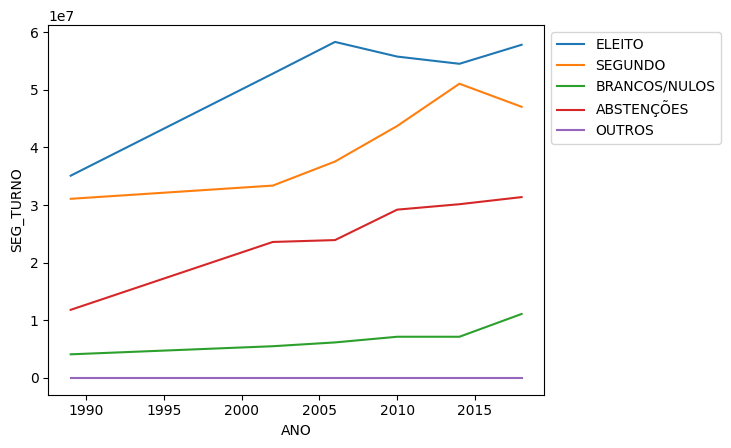

In [399]:
sns.lineplot(x='ANO',y='SEG_TURNO',data=dados2, hue='STATUS')
plt.legend(bbox_to_anchor=(1,1))

Já, em relação aos votos no segundo turno, todas as linhas do gráfico apresentam uma certa linearização.

### Diferença percentual entre 1º e 2º turno

In [400]:
dados2['DIF(%)'] = round((dados2['SEG_TURNO'] - dados2['PRI_TURNO'])*100/dados2['PRI_TURNO'],2)
dados2['DIF'] = dados2['SEG_TURNO'] - dados2['PRI_TURNO']
segundo_turno['DIF(%)'] = round((segundo_turno['SEG_TURNO'] - segundo_turno['PRI_TURNO'])*100/segundo_turno['PRI_TURNO'],2)

<AxesSubplot:xlabel='ANO', ylabel='DIF(%)'>

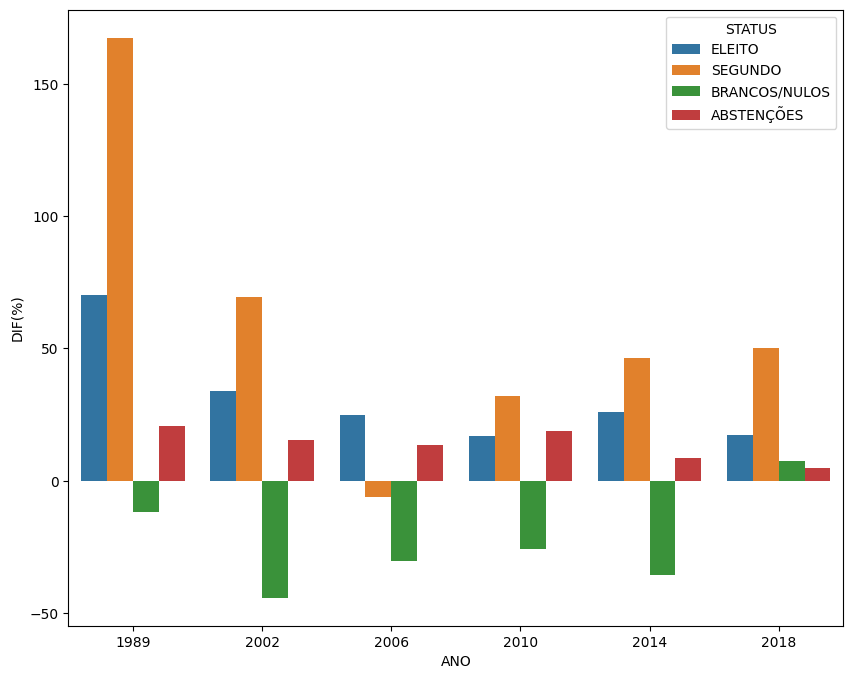

In [401]:
plt.figure(figsize=(10,8))
sns.barplot(x='ANO',y='DIF(%)',data=segundo_turno, hue='STATUS')

## Regressão linear considerando votos no 1º e 2º turno

### Candidato eleito

In [402]:
eleitos

,ANO,PRI_TURNO,SEG_TURNO,STATUS
0,1989,20611011,35089998.0,ELEITO
5,2002,39455233,52793364.0,ELEITO
10,2006,46662365,58295042.0,ELEITO
19,2010,47651434,55752529.0,ELEITO
24,2014,43267668,54501118.0,ELEITO
25,2018,49276990,57797847.0,ELEITO


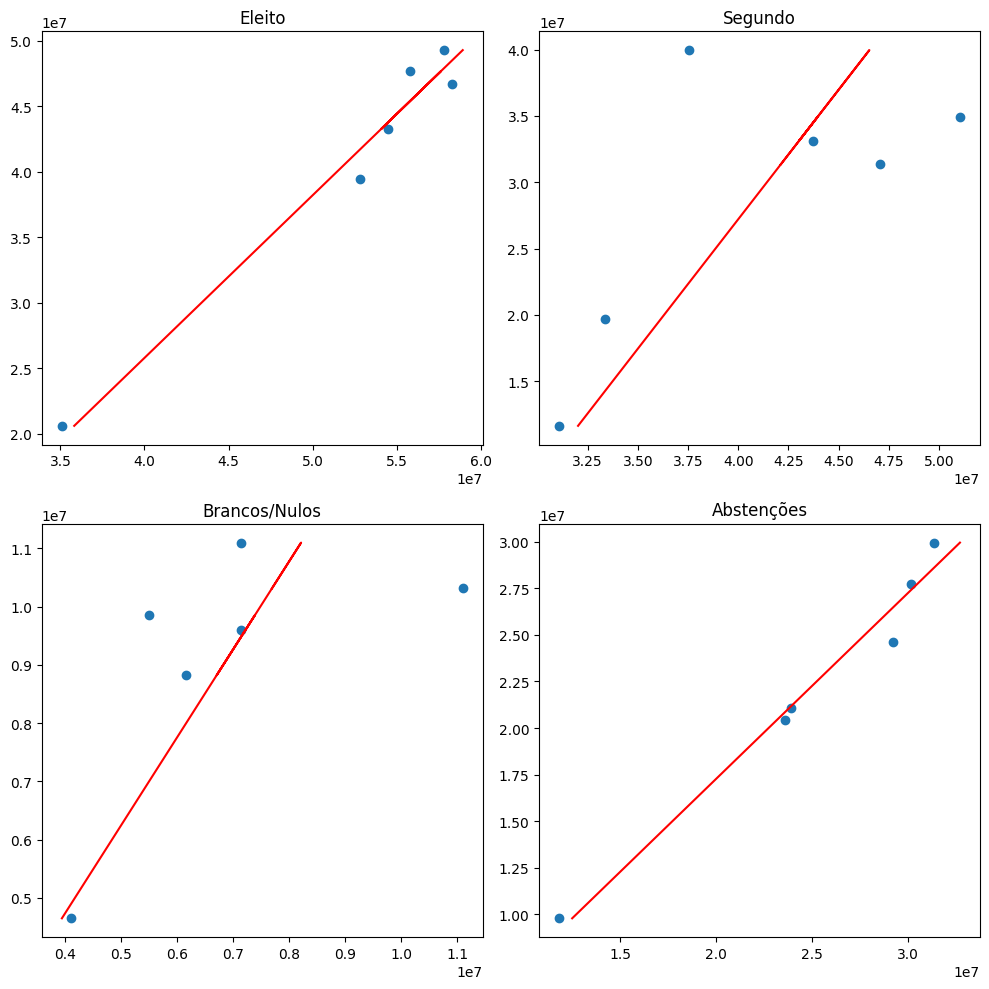

In [403]:
ax = plt.figure(figsize=(10,10))

# candidato eleito
plt.subplot(2,2,1)
x = eleitos['PRI_TURNO'].values.tolist()
y = eleitos['SEG_TURNO'].values.tolist()

z = np.polyfit(x,y,1)
p = np.poly1d(z)
f = np.polyval(p,x)

plt.scatter(y,x)
plt.plot(f,x, color='r')

plt.title('Eleito')

# candidato em segundo
plt.subplot(2,2,2)
x3 = segundos['PRI_TURNO'].values.tolist()
y3 = segundos['SEG_TURNO'].values.tolist()

z3 = np.polyfit(x3,y3,1)
p3 = np.poly1d(z3)
f3 = np.polyval(p3,x3)

plt.scatter(y3,x3)
plt.plot(f3,x3, color='r')

plt.title('Segundo')

# brancos e nulos
plt.subplot(2,2,3)
x1 = brancos_nulos['PRI_TURNO'].values.tolist()
y1 = brancos_nulos['SEG_TURNO'].values.tolist()

z1 = np.polyfit(x1,y1,1)
p1 = np.poly1d(z1)
f1 = np.polyval(p1,x1)

plt.scatter(y1,x1)
plt.plot(f1,x1, color='r')

plt.title('Brancos/Nulos')

# abstenções
plt.subplot(2,2,4)
x2 = abstencoes['PRI_TURNO'].values.tolist()
y2 = abstencoes['SEG_TURNO'].values.tolist()

z2 = np.polyfit(x2,y2,1)
p2 = np.poly1d(z2)
f2 = np.polyval(p2,x2)

plt.scatter(y2,x2)
plt.plot(f2,x2, color='r')

plt.title('Abstenções')

plt.tight_layout()

#### Lula

In [404]:
lula_2022 = p(57259504)
lula_2022

65345176.18691798

A partir da regressão linear feita com a comparação dos votos no 1º e 2º turno. Estima-se que o candidato Lula terá aproximadamente 65345176 votos no segundo turno.

#### Bolsonaro

In [405]:
bolso_2022 = p3(51072345)
bolso_2022

52213228.984706655

A partir da regressão linear feita com a comparação dos votos no 1º e 2º turno. Estima-se que o candidato Bolsonaro terá aproximadamente 52213228 votos no segundo turno.

### Resultados agrupados em um df

In [406]:
df_lula = pd.DataFrame({"CANDIDATO":["LULA"],"PRI_TURNO":[57259504], "SEG_TURNO":[65345176]})
df_bolso = pd.DataFrame({"CANDIDATO":["BOLSONARO"],"PRI_TURNO":[51072345], "SEG_TURNO":[52213228]})
df_brancos_nulos =pd.DataFrame({"CANDIDATO":["BRANCOS/NULOS"],"PRI_TURNO":[5452653], "SEG_TURNO":[4468361]})
df_abtencoes = pd.DataFrame({"CANDIDATO":["ABSTENÇÕES"],"PRI_TURNO":[32770982], "SEG_TURNO":[35543317]})

In [407]:
predicao_2022 = pd.concat([df_lula,df_bolso,df_brancos_nulos,df_abtencoes])
predicao_2022

,CANDIDATO,PRI_TURNO,SEG_TURNO
0,LULA,57259504,65345176
0,BOLSONARO,51072345,52213228
0,BRANCOS/NULOS,5452653,4468361
0,ABSTENÇÕES,32770982,35543317


In [408]:
segundo_turno.reset_index(inplace=True)

In [409]:
segundo_turno.drop('index',axis=1,inplace=True)

In [410]:
segundo_turno['PRED'] = 0

### Erro

In [411]:
for i in range(segundo_turno.shape[0]):
    
    if segundo_turno['STATUS'][i] == "ELEITO":
        segundo_turno['PRED'][i] = p(segundo_turno['PRI_TURNO'][i])
    
    elif segundo_turno['STATUS'][i] == "SEGUNDO":
        segundo_turno['PRED'][i] = p3(segundo_turno['PRI_TURNO'][i])
        
    elif segundo_turno['STATUS'][i] == "BRANCOS/NULOS":
        segundo_turno['PRED'][i] = p1(segundo_turno['PRI_TURNO'][i])
        
    else:
        segundo_turno['PRED'][i] = p2(segundo_turno['PRI_TURNO'][i])

In [412]:
segundo_turno['ERRO'] = round(((segundo_turno['PRED'] - segundo_turno['SEG_TURNO'])/segundo_turno['SEG_TURNO'])*100,2)

In [413]:
segundo_turno.describe()

,ANO,PRI_TURNO,SEG_TURNO,DIF(%),PRED,ERRO
count,24.000000,2.400000e+01,2.400000e+01,24.000000,2.400000e+01,24.00000
mean,2006.500000,2.522997e+07,3.121544e+07,20.406250,3.121544e+07,1.54625
std,9.578055,1.416991e+07,1.863946e+07,43.126082,1.840710e+07,12.27019
min,1989.000000,4.649897e+06,4.094339e+06,-44.160000,3.936650e+06,-30.71000
25%,2002.000000,1.090259e+07,1.163419e+07,2.067500,1.142280e+07,-2.76000
50%,2008.000000,2.285149e+07,3.122403e+07,17.145000,3.236223e+07,1.06000
75%,2014.000000,3.603672e+07,4.804097e+07,32.400000,4.458249e+07,4.62750
max,2018.000000,4.927699e+07,5.829504e+07,167.380000,5.891495e+07,34.20000


In [414]:
segundo_turno.query('STATUS == "ELEITO"')

,ANO,PRI_TURNO,SEG_TURNO,STATUS,DIF(%),PRED,ERRO
0,1989,20611011,35089998.0,ELEITO,70.25,3.582337e+07,2.09
4,2002,39455233,52793364.0,ELEITO,33.81,5.100313e+07,-3.39
8,2006,46662365,58295042.0,ELEITO,24.93,5.680876e+07,-2.55
12,2010,47651434,55752529.0,ELEITO,17.00,5.760550e+07,3.32
16,2014,43267668,54501118.0,ELEITO,25.96,5.407420e+07,-0.78
20,2018,49276990,57797847.0,ELEITO,17.29,5.891495e+07,1.93


In [415]:
segundo_turno.query('STATUS == "SEGUNDO"')

,ANO,PRI_TURNO,SEG_TURNO,STATUS,DIF(%),PRED,ERRO
1,1989,11622673,31076364.0,SEGUNDO,167.38,3.201981e+07,3.04
5,2002,19705445,33370739.0,SEGUNDO,69.35,3.615720e+07,8.35
9,2006,39968369,37543178.0,SEGUNDO,-6.07,4.652935e+07,23.94
13,2010,33132283,43711388.0,SEGUNDO,31.93,4.303011e+07,-1.56
17,2014,34897211,51041155.0,SEGUNDO,46.26,4.393353e+07,-13.93
21,2018,31342051,47040906.0,SEGUNDO,50.09,4.211373e+07,-10.47


In [416]:
segundo_turno.query('STATUS == "BRANCOS/NULOS"')

,ANO,PRI_TURNO,SEG_TURNO,STATUS,DIF(%),PRED,ERRO
2,1989,4649897,4094339.0,BRANCOS/NULOS,-11.95,3.936650e+06,-3.85
6,2002,9849827,5499898.0,BRANCOS/NULOS,-44.16,7.380864e+06,34.20
10,2006,8823726,6160001.0,BRANCOS/NULOS,-30.19,6.701218e+06,8.79
14,2010,9603594,7142025.0,BRANCOS/NULOS,-25.63,7.217770e+06,1.06
18,2014,11099068,7141606.0,BRANCOS/NULOS,-35.66,8.208309e+06,14.94
22,2018,10313159,11094698.0,BRANCOS/NULOS,7.58,7.687756e+06,-30.71


In [417]:
segundo_turno.query('STATUS == "ABSTENÇÕES"')

,ANO,PRI_TURNO,SEG_TURNO,STATUS,DIF(%),PRED,ERRO
3,1989,9793809,11814017.0,ABSTENÇÕES,20.63,1.249430e+07,5.76
7,2002,20449987,23589188.0,ABSTENÇÕES,15.35,2.318380e+07,-1.72
11,2006,21092675,23914741.0,ABSTENÇÕES,13.38,2.382850e+07,-0.36
15,2010,24610296,29197152.0,ABSTENÇÕES,18.64,2.735712e+07,-6.30
19,2014,27699435,30137479.0,ABSTENÇÕES,8.80,3.045591e+07,1.06
23,2018,29941171,31371704.0,ABSTENÇÕES,4.78,3.270466e+07,4.25


Comparando os resultados preditos pela regressão linear, observamos um erro absoluto baixo em relação aos votos do candidato eleito e das abstenções, o que já era esperado pelo gráfico de dispersão. Entretanto em relação aos votos no segundo colocado e brancos e nulos, apresentou-se erros muito grandes. Além disso, a predição feita sugere um aumento de votos significativo entre o primeiro e segundo turno de 2022, o que não é nada provável de acontecer. Logo, a predição realizada não deve ser considerada.

### Considerações Finais